# Load spectral data from the OpenRAMAN
---


## Load an individual spectrum

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from ramanalysis import RamanSpectrum, RamanSpectra

In [2]:
RamanSpectrum.from_openraman_csvfiles?

Signature:
RamanSpectrum.from_openraman_csvfiles(
    csv_filepath: 'Path | str',
    csv_filepath_excitation_calibration: 'Path | str',
    csv_filepath_emission_calibration: 'Path | str',
    excitation_wavelength_nm: 'float' = 532,
    kernel_size: 'int' = 3,
) -> 'RamanSpectrum'
Docstring:
Load a Raman spectrum from a CSV file output by the OpenRAMAN spectrometer.

Args:
    kernel_size:
        Kernel size of the median filter to be applied to the calibration spectra. Must be
        an odd integer. Set `kernel_size` to 1 to avoid smoothing. Default size is 3.
File:      ~/Repositories/ramanalysis/ramanalysis/load_spectra.py
Type:      method

In [3]:
example_data_directory = Path("../../ramanalysis/tests/example_data")

csv_filepath_sample = next(example_data_directory.glob("*CC-125*.csv"))
csv_filepath_excitation_calibration = next(example_data_directory.glob("*neon*.csv"))
csv_filepath_emission_calibration = next(example_data_directory.glob("*aceto*.csv"))

spectrum = RamanSpectrum.from_openraman_csvfiles(
    csv_filepath_sample,
    csv_filepath_excitation_calibration,
    csv_filepath_emission_calibration,
)

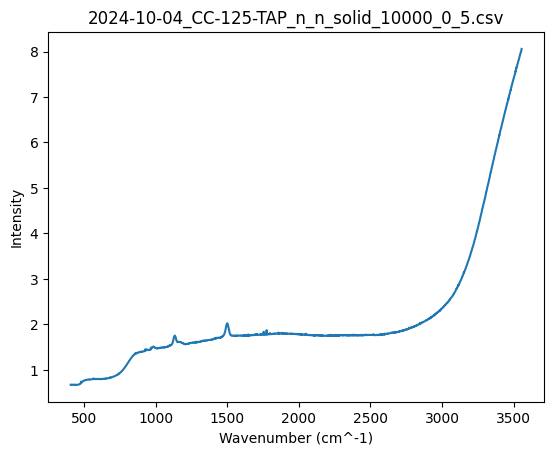

In [4]:
fig, ax = plt.subplots()

ax.plot(spectrum.wavenumbers_cm1, spectrum.intensities)
ax.set_title(csv_filepath_sample.name)
ax.set_xlabel("Wavenumber (cm^-1)")
ax.set_ylabel("Intensity");

---
## Load a batch of spectra

In [5]:
RamanSpectra?

Init signature: RamanSpectra(spectra: 'dict[str, RamanSpectrum]') -> None
Docstring:      RamanSpectra(spectra: 'dict[str, RamanSpectrum]')
File:           ~/Repositories/ramanalysis/ramanalysis/load_spectra.py
Type:           type
Subclasses:     

In [6]:
spectra = RamanSpectra.from_input_directory_dirty(example_data_directory, sample_glob_str="*CC*").spectra

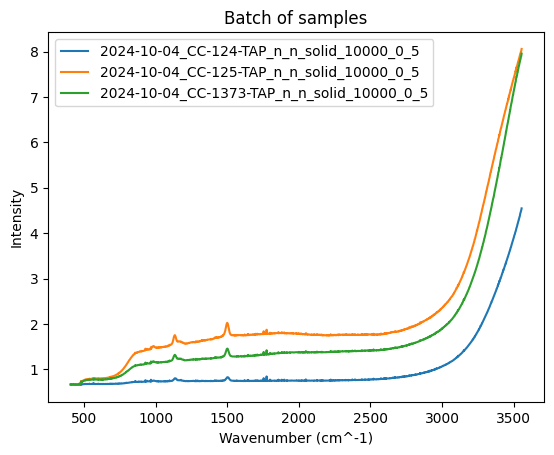

In [7]:
fig, ax = plt.subplots()

for sample, spectrum in spectra.items():
    ax.plot(spectrum.wavenumbers_cm1, spectrum.intensities, label=sample)

ax.legend()
ax.set_title("Batch of samples")
ax.set_xlabel("Wavenumber (cm^-1)")
ax.set_ylabel("Intensity");